<a href="https://colab.research.google.com/github/Kan-tapon/229352-Statistical-Learning-for-Data-Science-670510751/blob/main/Lab06_SVM_670510751.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [ ]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

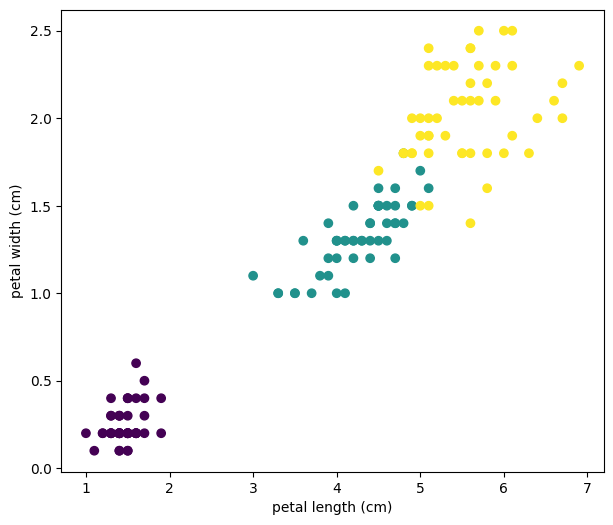

In [ ]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [ ]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [ ]:
#TODO

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (120, 2)
X_test shape: (30, 2)
y_train shape: (120,)
y_test shape: (30,)


#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

In [ ]:
#TODO

Training LinearSVC with C = 0.01


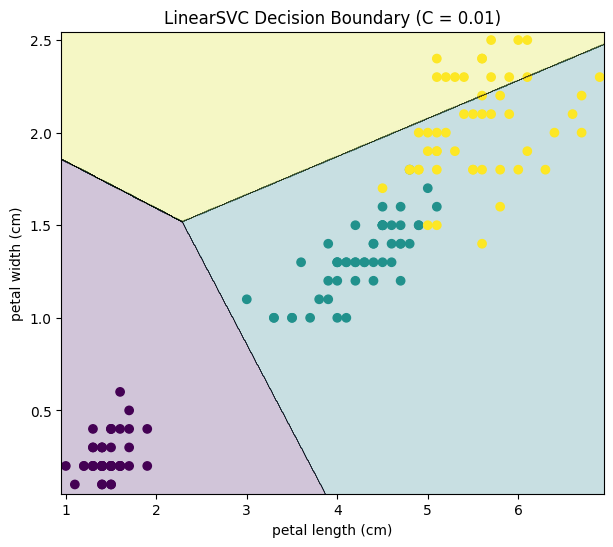

Training LinearSVC with C = 0.1


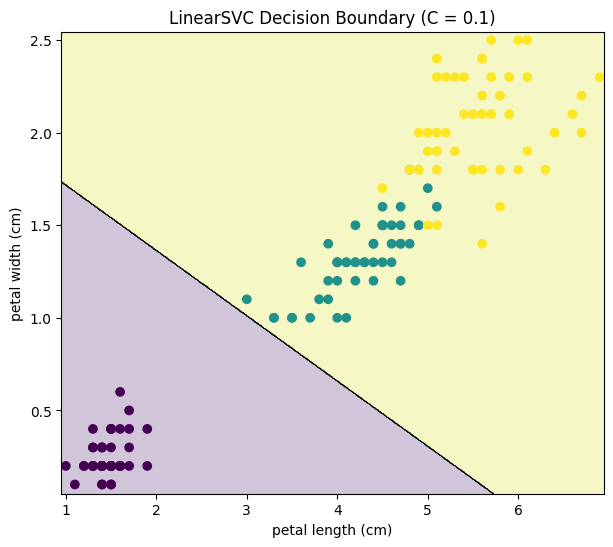

Training LinearSVC with C = 1.0


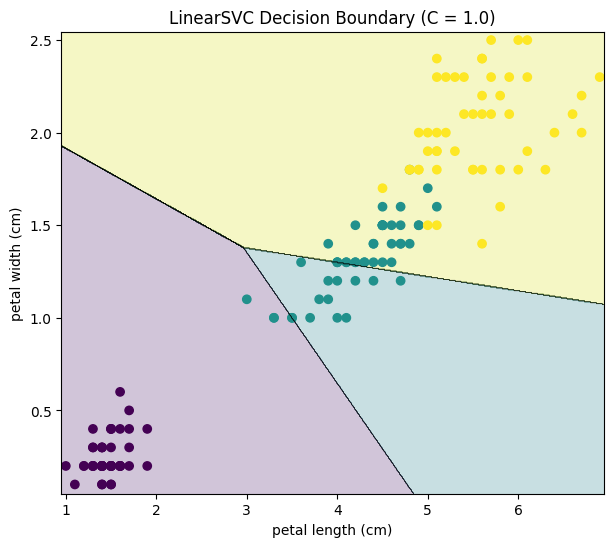

Training LinearSVC with C = 10.0


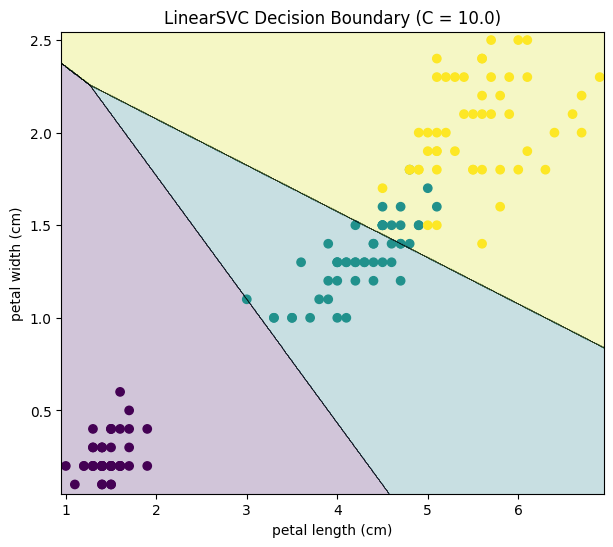

Training LinearSVC with C = 100.0


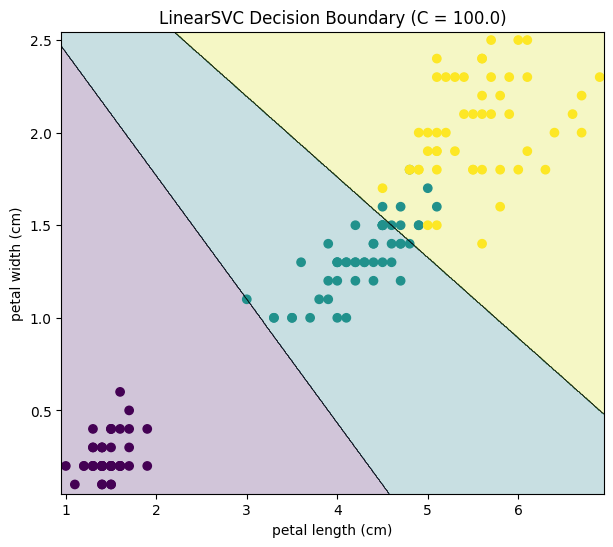

In [ ]:
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for C in C_values:
    print(f"Training LinearSVC with C = {C}")
    # Instantiate LinearSVC model
    # The dual=False setting is recommended when n_samples > n_features, as is the case here.
    # Setting random_state for reproducibility.
    svm_clf = LinearSVC(loss='hinge', C=C, max_iter=100000, random_state=42)

    # Train the model
    svm_clf.fit(X_train, y_train)

    # Plot the decision boundary
    plot_decision_boundary(svm_clf, X, y)
    plt.title(f'LinearSVC Decision Boundary (C = {C})')
    plt.show()

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [ ]:
selected_C = 1.0 # Chosen C value after reviewing plots from Exercise 2

print(f"Training LinearSVC with selected C = {selected_C} for test error calculation.")

# Instantiate LinearSVC model with the selected C
svm_clf_selected_C = LinearSVC(loss='hinge', C=selected_C, max_iter=100000, random_state=42)

# Train the model
svm_clf_selected_C.fit(X_train, y_train)

# Calculate test accuracy
test_accuracy = svm_clf_selected_C.score(X_test, y_test)
print(f"Test Accuracy with C = {selected_C}: {test_accuracy:.4f}")

# Calculate test error
test_error = 1 - test_accuracy
print(f"Test Error with C = {selected_C}: {test_error:.4f}")

Training LinearSVC with selected C = 1.0 for test error calculation.
Test Accuracy with C = 1.0: 0.8333
Test Error with C = 1.0: 0.1667


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

Training SVC with kernel='rbf', C=1.0, gamma = 0.01


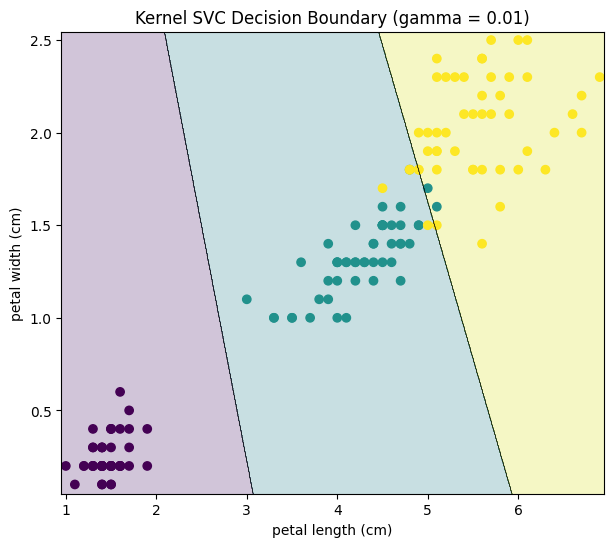

Training SVC with kernel='rbf', C=1.0, gamma = 0.1


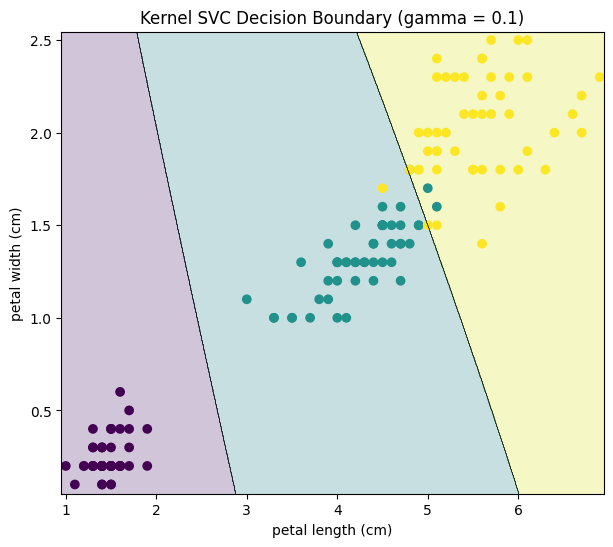

Training SVC with kernel='rbf', C=1.0, gamma = 1.0


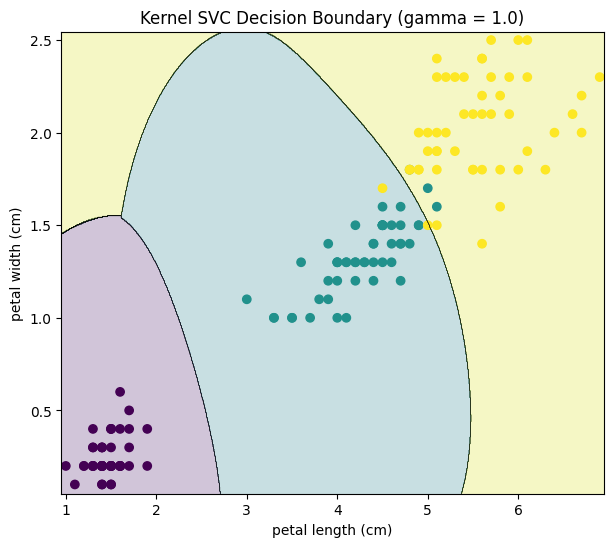

Training SVC with kernel='rbf', C=1.0, gamma = 10.0


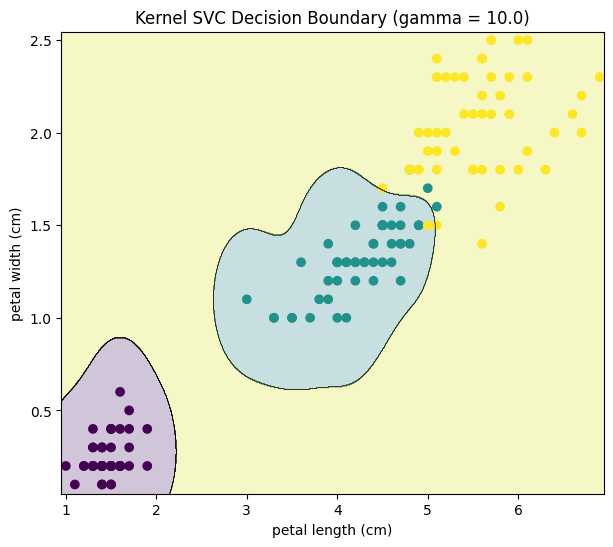

Training SVC with kernel='rbf', C=1.0, gamma = 100.0


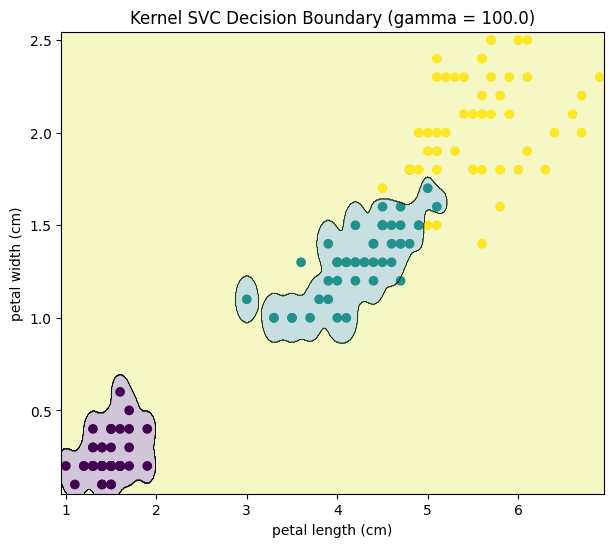

In [ ]:
gamma_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for gamma in gamma_values:
    print(f"Training SVC with kernel='rbf', C=1.0, gamma = {gamma}")
    # Instantiate SVC model with RBF kernel
    svm_clf_rbf = SVC(kernel='rbf', C=1.0, gamma=gamma, random_state=42, max_iter=100000)

    # Train the model
    svm_clf_rbf.fit(X_train, y_train)

    # Plot the decision boundary
    plot_decision_boundary(svm_clf_rbf, X, y)
    plt.title(f'Kernel SVC Decision Boundary (gamma = {gamma})')
    plt.show()

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [ ]:
selected_gamma = 1.0 # Chosen gamma value after reviewing plots from Exercise 4

print(f"Training SVC with selected gamma = {selected_gamma} for test error and support vector calculation.")

# Instantiate SVC model with the selected gamma
svm_clf_selected_gamma = SVC(kernel='rbf', C=1.0, gamma=selected_gamma, random_state=42, max_iter=100000)

# Train the model
svm_clf_selected_gamma.fit(X_train, y_train)

# Calculate test accuracy
test_accuracy_rbf = svm_clf_selected_gamma.score(X_test, y_test)
print(f"Test Accuracy with gamma = {selected_gamma}: {test_accuracy_rbf:.4f}")

# Calculate test error
test_error_rbf = 1 - test_accuracy_rbf
print(f"Test Error with gamma = {selected_gamma}: {test_error_rbf:.4f}")

# Report the number of support vectors
print(f"Number of support vectors per class: {svm_clf_selected_gamma.n_support_}")

Training SVC with selected gamma = 1.0 for test error and support vector calculation.
Test Accuracy with gamma = 1.0: 1.0000
Test Error with gamma = 1.0: 0.0000
Number of support vectors per class: [ 3 12 15]


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

#### Comparison between Linear SVM and Kernel SVM for Iris Data:

Based on the analysis of test accuracy and decision boundary plots from the previous exercises:

1.  **Test Accuracy:**
    *   **Linear SVM (with C = 1.0):** The test error was **0.1667**, meaning a test accuracy of approximately **83.33%**.
    *   **Kernel SVM (RBF kernel with gamma = 1.0, C = 1.0):** The test error was **0.0000**, meaning a perfect test accuracy of **100%**.

    Based purely on test accuracy, the **Kernel SVM** with an RBF kernel clearly outperforms the Linear SVM on this dataset, achieving flawless classification on the test set.

2.  **Decision Boundary Plots:**
    *   **Linear SVM:** The decision boundaries for Linear SVM were straight lines. While they performed reasonably well, especially for separating one class, they struggled to perfectly separate the overlapping classes (e.g., versicolor and virginica) that are not linearly separable in the 2D feature space (petal length vs. petal width). Even with varying `C`, the linear nature of the boundary was a limiting factor.
    *   **Kernel SVM (RBF kernel):** The decision boundaries for the RBF kernel SVM were non-linear and more flexible. With an appropriate `gamma` value (e.g., `gamma = 1.0`), the model was able to create curved boundaries that effectively separated all three classes, even in regions where they overlapped in the original feature space. This flexibility allowed the model to capture the complex relationships within the data, leading to better classification.